Для компании "Цифра", разрабатывающей решения для эффективной работы промышленных предприятий, необходимо обучить модель предсказывать коэффициент восстановления золота из данной руды Имеются данные со значениями добычи и очистки золотосодержащей руды. Модель поможет оптимизировать процесс производства, чтобы предприятие работало без убытков.

**1  Подготовка данных**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')
display(data_train.head())
display(data_test.head())
display(data_full.head())

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [3]:
print(data_train.shape)
print(data_test.shape)
print(data_full.shape)

(14149, 87)
(5290, 53)
(19439, 87)


In [4]:
print(data_train.info())
print(data_test.info())
print(data_full.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


Добавим в тестовую выборку данные со значениями финального выхода продукта и полученного после флотации продукта.

In [5]:
data_test = data_test.merge(data_full[['date','final.output.recovery', 'rougher.output.recovery']], on='date', how = 'left')

Согласно имеющимся данным, соседние данные похожи. Заполняем недостающие данные соседними.

In [6]:
data_train = data_train.ffill(axis=0) 
data_test = data_test.ffill(axis=0)
data_full = data_full.ffill(axis=0)

In [7]:
print(data_train.shape)
print(data_test.shape)
print(data_full.shape)

(14149, 87)
(5290, 55)
(19439, 87)


Проверяем,правильно ли рассчитана эффективность обогащения на обучающей выборке для признака rougher.output.recovery.

In [8]:
c_value = data_train['rougher.output.concentrate_au'] 
t_value = data_train['rougher.output.tail_au']
f_value = data_train['rougher.input.feed_au']    

In [9]:
recovery = ((c_value*(f_value - t_value))/(f_value * (c_value-t_value)))*100
recovery_table = data_train['rougher.output.recovery']
print(f'MAE: {mean_absolute_error(recovery, recovery_table):.2f}')
print(recovery.mean())
print(recovery_table.mean())

MAE: 0.00
82.70450164550293
82.70450164550293


Проверили расчеты эффективности обогащения руды, согласно формуле, и имеющимися значениями в столбце data_train['rougher.output.recovery']. Метрика MAE подтверждает, что расчет произведен верно.

Не все данные обучающей выборки есть в тестовых данных. Проверим, колонки с какими данными отсутствуют.

In [10]:
columns_3 = []
for column in data_train.columns:
    if column not in data_test.columns:
        columns_3.append(column)

In [11]:
columns_not_in_test = set(data_train.columns) - set(data_test.columns)
print(columns_not_in_test)

{'primary_cleaner.output.tail_pb', 'rougher.output.tail_ag', 'final.output.concentrate_au', 'final.output.concentrate_ag', 'primary_cleaner.output.concentrate_au', 'rougher.output.concentrate_sol', 'rougher.output.concentrate_pb', 'final.output.tail_au', 'rougher.output.tail_au', 'primary_cleaner.output.tail_ag', 'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'rougher.output.concentrate_ag', 'rougher.output.tail_pb', 'secondary_cleaner.output.tail_sol', 'final.output.concentrate_sol', 'secondary_cleaner.output.tail_pb', 'final.output.tail_ag', 'rougher.output.tail_sol', 'final.output.tail_pb', 'rougher.calculation.au_pb_ratio', 'primary_cleaner.output.tail_sol', 'final.output.concentrate_pb', 'primary_cleaner.output.tail_au', 'secondary_cleaner.output.tail_au', 'rougher.output.concentrate_au', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'secondary_cleaner.output.tail_ag', 'rougher.calculation.sulfate

Получается, что в тестовой выборке нет данных по параметрам продукта на выходе после проведения флоатации или очистки. Данные, получаемые на финальном этапе - целевые признаки процесса очистки руды. Данные, получаемые после провдеения промежуточных этапов возможно недоступны, потому что замеряются и/или рассчитываются значительно позже.

**2  Анализ данных**

Рассмотрим концентрацию металлов на разных уровнях очистки руды. Рассмотрим отношение концентрата руды следующего этапа к концентрату руды предыдущего этапа.

In [12]:
first_diff_au = data_train['rougher.output.concentrate_au']/data_train['rougher.input.feed_au']
second_diff_au = data_train['primary_cleaner.output.concentrate_au']/data_train['rougher.output.concentrate_au']
third_diff_au = data_train['final.output.concentrate_au']/data_train['primary_cleaner.output.concentrate_au']
print(first_diff_au)
print(second_diff_au)
print(third_diff_au)

0        3.051704
1        3.094963
2        3.102245
3        3.157930
4        3.392849
           ...   
14144    3.486512
14145    3.811301
14146    3.339453
14147    4.087936
14148    4.078380
Length: 14149, dtype: float64
0        1.726521
1        1.701589
2        1.721091
3        1.462710
4        1.719648
           ...   
14144    1.770641
14145    1.785399
14146    2.108150
14147    1.725331
14148    1.705032
Length: 14149, dtype: float64
0        1.234608
1        1.251567
2        1.255760
3        1.510570
4        1.294424
           ...   
14144    1.418144
14145    1.423427
14146    1.468942
14147    1.508185
14148    1.525184
Length: 14149, dtype: float64


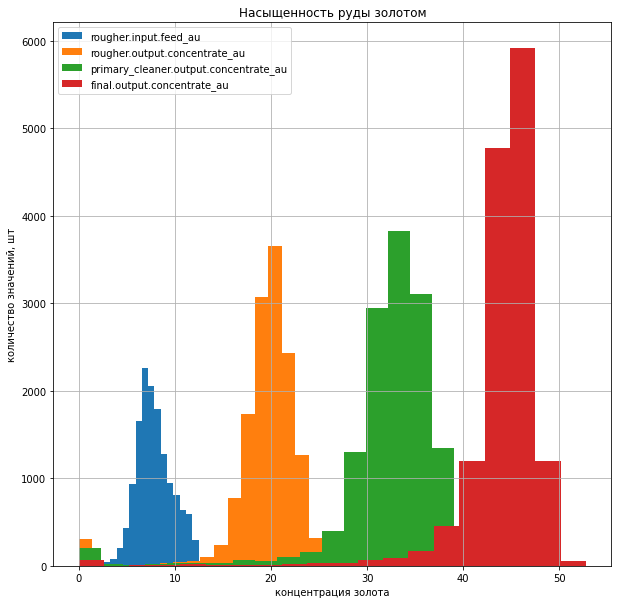

In [13]:
fig, ax = plt.subplots()
data_train['rougher.input.feed_au'].hist(bins=20, figsize = (10, 10), legend = True)
data_train['rougher.output.concentrate_au'].hist(bins=20, figsize = (10, 10), legend = True)
data_train['primary_cleaner.output.concentrate_au'].hist(bins=20, figsize = (10, 10), legend = True)
data_train['final.output.concentrate_au'].hist(bins=20, figsize = (10, 10), legend = True)
plt.title('Насыщенность руды золотом')
ax.set_xlabel('концентрация золота')
ax.set_ylabel('количество значений, шт');

Видим, что на каждом этапе происходит увеличение насыщенности руды золотом. Значение концентрата в долевом соотношении превышает содержание золота в предыдущем этапе. После флотации содержание золота в руде в 3,5 раза превышает содержание золота перед этапом флотации. После этапа первичной очистки содержание золота в руде в 1,7 раза превышает содержание золота после этапа флотации. После этапа вторичной очистки содержание золота в руде в 1,5 раза превышает содержание золота после этапа первичной очистки.

In [14]:
first_diff_pb = data_train['rougher.output.concentrate_pb']/data_train['rougher.input.feed_pb']
second_diff_pb = data_train['primary_cleaner.output.concentrate_pb']/data_train['rougher.output.concentrate_pb']
third_diff_pb = data_train['final.output.concentrate_pb']/data_train['primary_cleaner.output.concentrate_pb']
print(first_diff_pb)
print(second_diff_pb)
print(third_diff_pb)

0        3.107811
1        3.212137
2        3.341712
3        3.521244
4        4.051881
           ...   
14144    2.378747
14145    2.626838
14146    2.227644
14147    2.730372
14148    2.761327
Length: 14149, dtype: float64
0        1.463109
1        1.442141
2        1.434770
3        1.184088
4        1.379351
           ...   
14144    1.133099
14145    1.159414
14146    1.410761
14147    1.127354
14148    1.088593
Length: 14149, dtype: float64
0        0.951875
1        0.949688
2        0.986431
3        1.174242
4        1.015593
           ...   
14144    0.912443
14145    0.899034
14146    0.905079
14147    0.967801
14148    1.007515
Length: 14149, dtype: float64


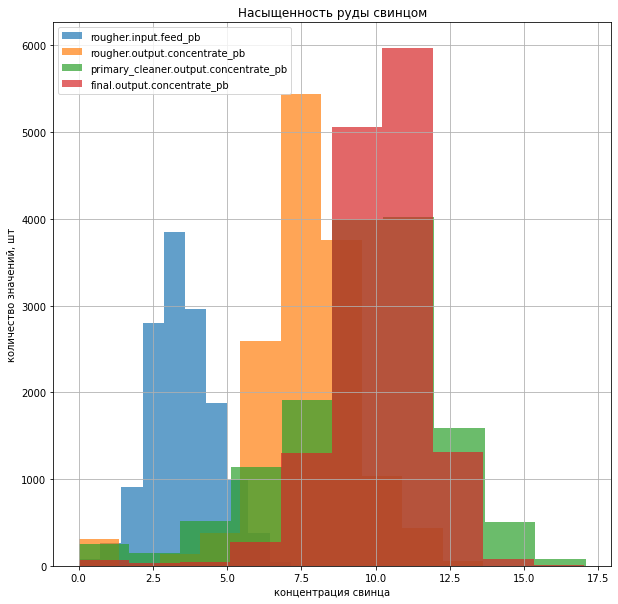

In [15]:
fig, ax = plt.subplots()
data_train['rougher.input.feed_pb'].hist(bins=10, figsize = (10, 10), alpha = 0.7, legend = True)
data_train['rougher.output.concentrate_pb'].hist(bins=10, figsize = (10, 10), alpha = 0.7, legend = True)
data_train['primary_cleaner.output.concentrate_pb'].hist(bins=10, figsize = (10, 10), alpha = 0.7, legend = True)
data_train['final.output.concentrate_pb'].hist(bins=10, figsize = (10, 10), alpha = 0.7, legend = True)
plt.title('Насыщенность руды свинцом')
ax.set_xlabel('концентрация свинца')
ax.set_ylabel('количество значений, шт');

На основании полученных данных получаем, что в процессе флотации концентрация свинца возрастает в 3 раза. После первичной очистки руды происходит увеличение насыщенности руды свинцом, приблизительно в 1,4 раза. Однако, после этапа вторичной очистки содержание свинца в руде не изменилось по сравнению с концентратом свинца после этапа первичной очистки.

In [16]:
first_diff_ag = data_train['rougher.output.concentrate_ag']/data_train['rougher.input.feed_ag']
second_diff_ag = data_train['primary_cleaner.output.concentrate_ag']/data_train['rougher.output.concentrate_ag']
third_diff_ag = data_train['final.output.concentrate_ag']/data_train['primary_cleaner.output.concentrate_ag']
print(first_diff_ag)
print(second_diff_ag)
print(third_diff_ag)

0        1.885255
1        1.885352
2        1.912178
3        1.971610
4        2.047719
           ...   
14144    1.826192
14145    1.866587
14146    1.427598
14147    1.927670
14148    1.941879
Length: 14149, dtype: float64
0        0.743216
1        0.736815
2        0.735609
3        0.606114
4        0.732366
           ...   
14144    0.589594
14145    0.578714
14146    0.836382
14147    0.642471
14148    0.630260
Length: 14149, dtype: float64
0        0.708437
1        0.704469
2        0.703891
3        0.837452
4        0.676456
           ...   
14144    0.491666
14145    0.483333
14146    0.436252
14147    0.449538
14148    0.477391
Length: 14149, dtype: float64


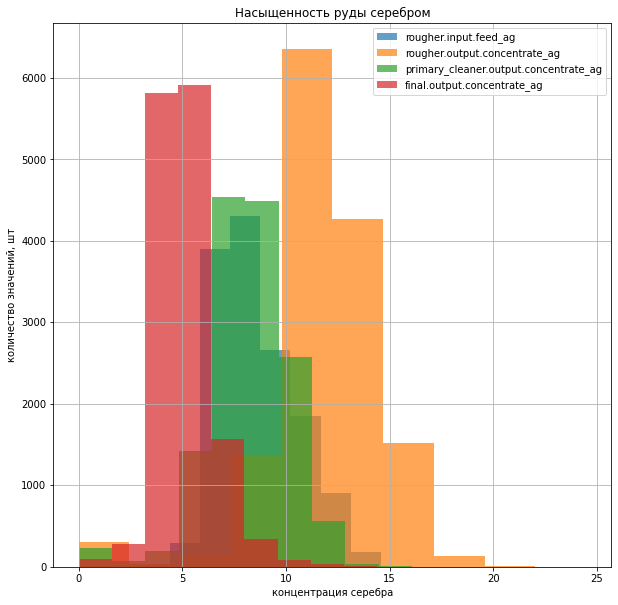

In [17]:
fig, ax = plt.subplots()
data_train['rougher.input.feed_ag'].hist(bins=10, figsize = (10, 10), alpha = 0.7, legend = True)
data_train['rougher.output.concentrate_ag'].hist(bins=10, figsize = (10, 10), alpha = 0.7, legend = True)
data_train['primary_cleaner.output.concentrate_ag'].hist(bins=10, figsize = (10, 10), alpha = 0.7, legend = True)
data_train['final.output.concentrate_ag'].hist(bins=10, figsize = (10, 10), alpha = 0.7, legend = True)
plt.title('Насыщенность руды серебром')
ax.set_xlabel('концентрация серебра')
ax.set_ylabel('количество значений, шт');

Данные по наличию серебра в руде говорят о том, что практически на каждом этапе происходит уменьшение насыщенности руды серебром. Только на этапе флотации концентрация серебра в руде увеличилась по сравнению с загруженным сырьем (примерно в 2 раза). После этапа первичной очистки содержание серебра в руде составляет 0,7 от содержания серебра после этапа флотации. После этапа вторичной очистки содержание серебра в руде составляет всего 0,5 от концентрации серебра после этапа первичной очистки.

Сравним распределение размеров гранул сырья на обучающей и тестовой выборках.

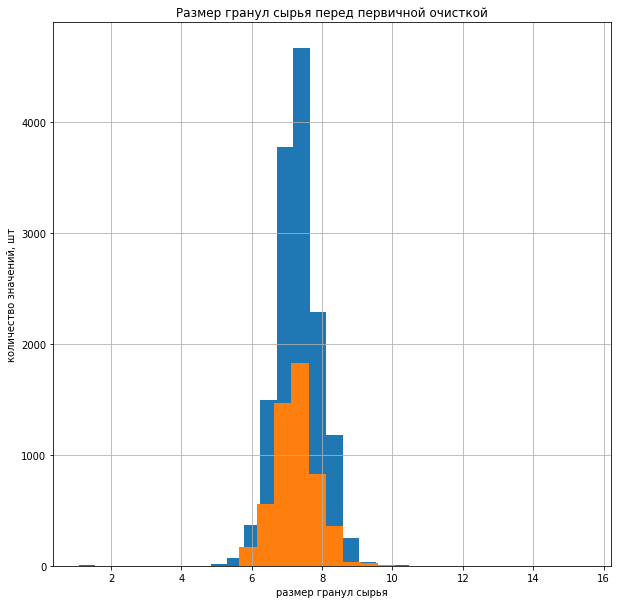

In [18]:
fig, ax = plt.subplots()
data_train['primary_cleaner.input.feed_size'].hist(bins=20, figsize = (10, 10))
data_test['primary_cleaner.input.feed_size'].hist(bins=20, figsize = (10, 10))
plt.title('Размер гранул сырья перед первичной очисткой')
ax.set_xlabel('размер гранул сырья')
ax.set_ylabel('количество значений, шт');

На гистограммах видно, что распредение значений гранул сырья перед первичной очисткой для обеих выборок одинаковый.

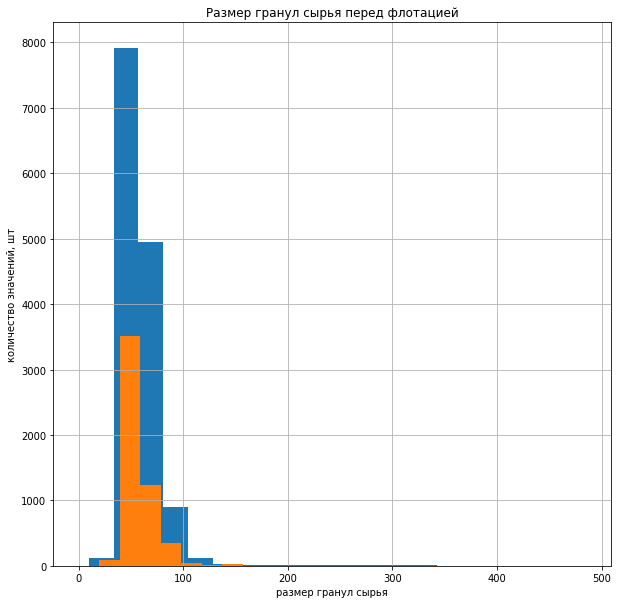

In [19]:
fig, ax = plt.subplots()
data_train['rougher.input.feed_size'].hist(bins=20, figsize = (10, 10))
data_test['rougher.input.feed_size'].hist(bins=20, figsize = (10, 10))
plt.title('Размер гранул сырья перед флотацией')
ax.set_xlabel('размер гранул сырья')
ax.set_ylabel('количество значений, шт');

Распределение данных в выборках отличается, однако уже перед первичной очисткой размеры гранулы будут выровнены, так что расчета модели будет произведен верно.

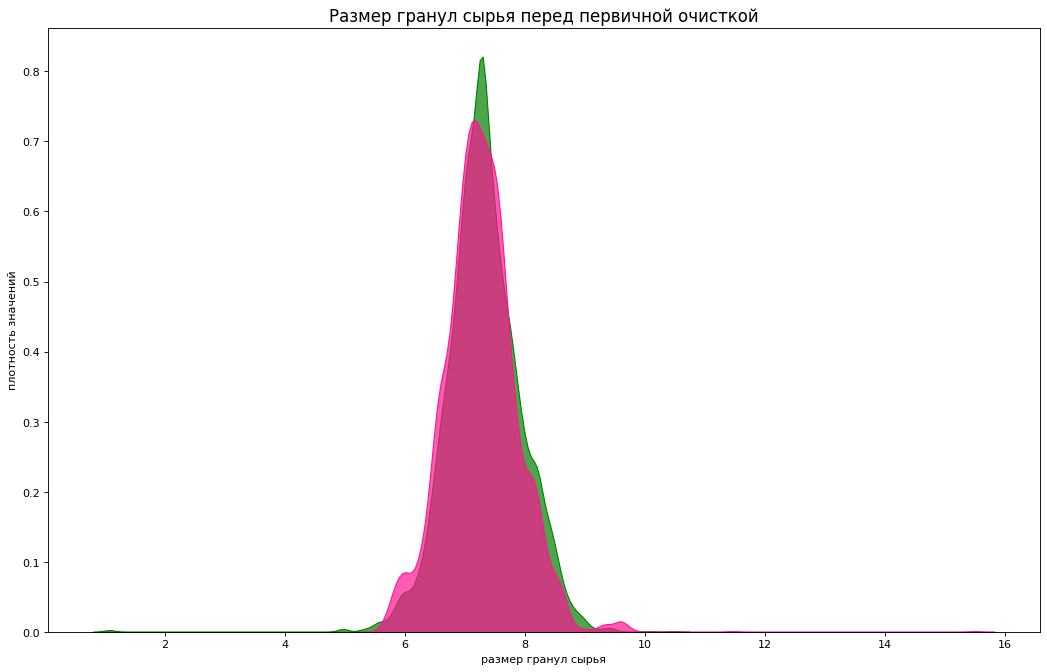

In [20]:
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(data_train['primary_cleaner.input.feed_size'], shade=True, color="g", alpha=.7)
sns.kdeplot(data_test['primary_cleaner.input.feed_size'], shade=True, color="deeppink", alpha=.7)
plt.title('Размер гранул сырья перед первичной очисткой', fontsize=15)
plt.xlabel('размер гранул сырья')
plt.ylabel('плотность значений');

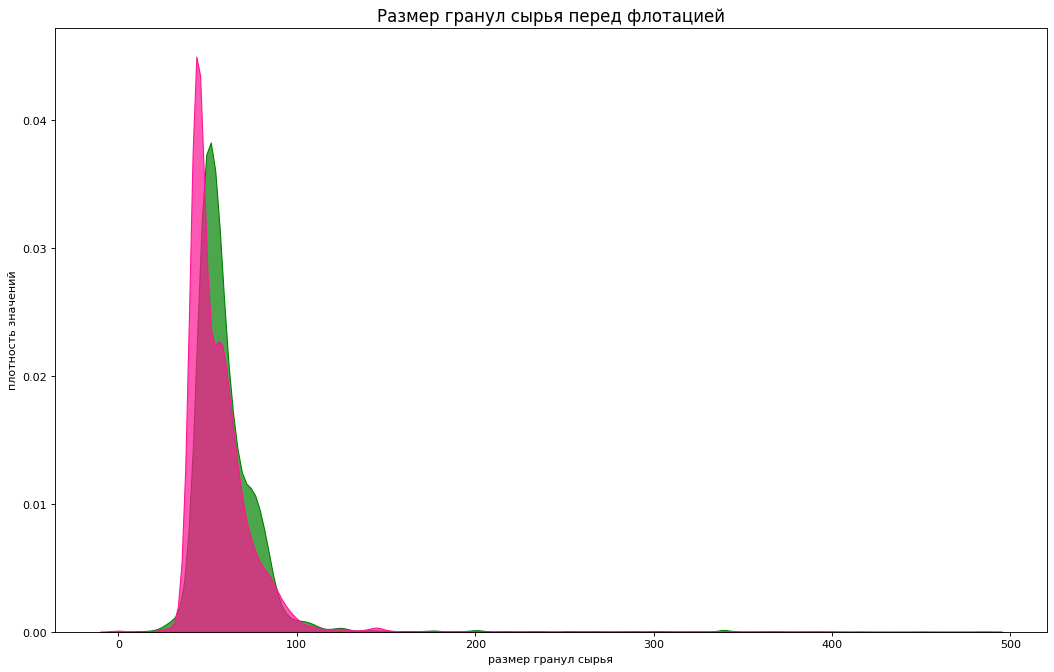

In [21]:
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(data_train['rougher.input.feed_size'], shade=True, color="g", alpha=.7)
sns.kdeplot(data_test['rougher.input.feed_size'], shade=True, color="deeppink", alpha=.7)
plt.title('Размер гранул сырья перед флотацией', fontsize=15)
plt.xlabel('размер гранул сырья')
plt.ylabel('плотность значений');

Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

In [22]:
sum_concentrate_final = data_train['final.output.concentrate_ag'] + data_train['final.output.concentrate_au'] + data_train['final.output.concentrate_pb']
sum_concentrate_primary = data_train['primary_cleaner.output.concentrate_ag'] + data_train['primary_cleaner.output.concentrate_au'] + data_train['primary_cleaner.output.concentrate_pb']
sum_concentrate_rougher = data_train['rougher.output.concentrate_ag'] + data_train['rougher.output.concentrate_au'] + data_train['rougher.output.concentrate_pb']
sum_concentrate_input = data_train['rougher.input.feed_ag'] + data_train['rougher.input.feed_au'] + data_train['rougher.input.feed_pb']
print(sum_concentrate_final.sum())
print(sum_concentrate_primary.sum())
print(sum_concentrate_rougher.sum())
print(sum_concentrate_input.sum())

838732.3497421335
709661.4292788382
550117.7172545104
282290.04829645605


Суммарная концентрацию металлов показывает, что с каждым этапом очистки (от флотации до финальных концентратов) концентрация металлов увеличивается.

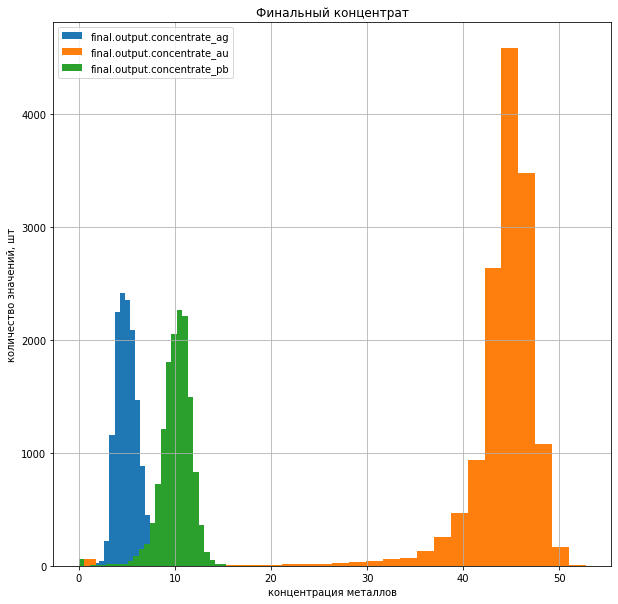

In [23]:
fig, ax = plt.subplots()
data_train['final.output.concentrate_ag'].hist(bins=30, figsize = (10, 10), legend = True)
data_train['final.output.concentrate_au'].hist(bins=30, figsize = (10, 10), legend = True)
data_train['final.output.concentrate_pb'].hist(bins=30, figsize = (10, 10), legend = True)
plt.title('Финальный концентрат')
ax.set_xlabel('концентрация металлов')
ax.set_ylabel('количество значений, шт');

На данном этапе на гистограмме можно увидеть выбросы в данных концентрации золота и свинца. Значения концентрации для золота <20 и для свинца <3 отбросим, т.к. они являются аномальными данными

In [24]:
data_train = data_train.loc[(data_train['final.output.concentrate_au']>20) & (data_train['final.output.concentrate_pb']>3)]

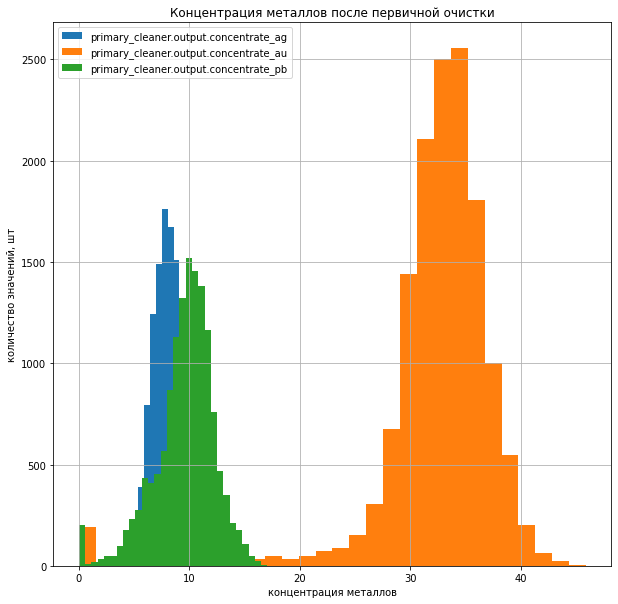

In [25]:
fig, ax = plt.subplots()
data_train['primary_cleaner.output.concentrate_ag'].hist(bins=30, figsize = (10, 10), legend = True)
data_train['primary_cleaner.output.concentrate_au'].hist(bins=30, figsize = (10, 10), legend = True)
data_train['primary_cleaner.output.concentrate_pb'].hist(bins=30, figsize = (10, 10), legend = True)
plt.title('Концентрация металлов после первичной очистки')
ax.set_xlabel('концентрация металлов')
ax.set_ylabel('количество значений, шт');

На данном этапе на гистограмме можно увидеть выбросы в данных концентрации золота и свинца. Значения концентрации для золота и для свинца <3 отбросим, т.к. они являются аномальными данными

In [26]:
data_train = data_train.loc[(data_train['primary_cleaner.output.concentrate_au']>3) & (data_train['primary_cleaner.output.concentrate_pb']>3)]

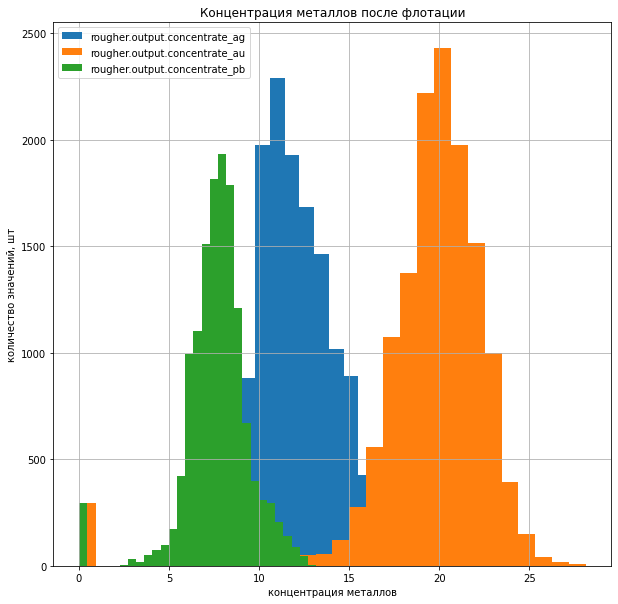

In [27]:
fig, ax = plt.subplots()
data_train['rougher.output.concentrate_ag'].hist(bins=30, figsize = (10, 10), legend = True)
data_train['rougher.output.concentrate_au'].hist(bins=30, figsize = (10, 10), legend = True)
data_train['rougher.output.concentrate_pb'].hist(bins=30, figsize = (10, 10), legend = True)
plt.title('Концентрация металлов после флотации')
ax.set_xlabel('концентрация металлов')
ax.set_ylabel('количество значений, шт');

На данном этапе на гистограмме можно увидеть выбросы в данных концентрации золота и свинца. Снова отбросим значения концентрации для золота и для свинца <3, т.к. они являются аномальными для текущих значений

In [28]:
data_train = data_train.loc[(data_train['rougher.output.concentrate_au']>3) & (data_train['rougher.output.concentrate_pb']>3)]

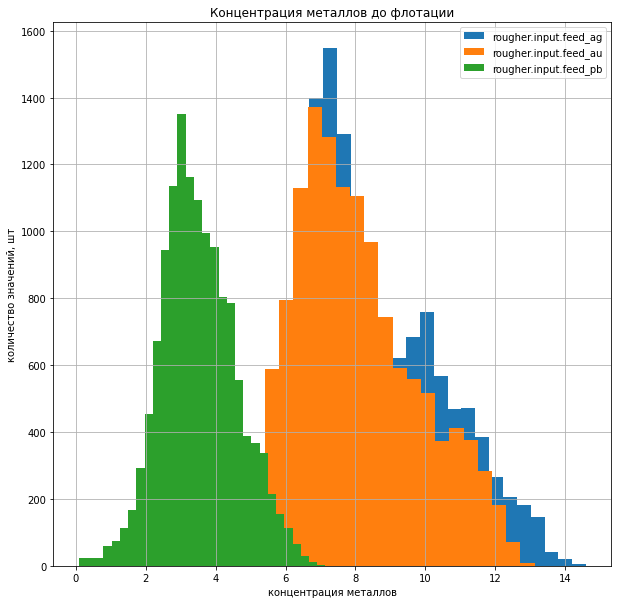

In [29]:
fig, ax = plt.subplots()
data_train['rougher.input.feed_ag'].hist(bins=30, figsize = (10, 10), legend = True)
data_train['rougher.input.feed_au'].hist(bins=30, figsize = (10, 10), legend = True)
data_train['rougher.input.feed_pb'].hist(bins=30, figsize = (10, 10), legend = True)
plt.title('Концентрация металлов до флотации')
ax.set_xlabel('концентрация металлов')
ax.set_ylabel('количество значений, шт');

На этапе поступления сырья на флотацию гистограмма показывает нормальное распределение концентрации металлов.

**3  Модель**

Необходимо рассчитать итоговую величину sMAPE. Итоговая величина метрики будет равна сумме 25% от расчетной величины эффективности обогащения чернового концентрата и 75% от эффективности обогащения итогового концентрата.

In [30]:
def smape(target, predict):
    smape = (1/len(target)) * np.sum(2*np.abs(target-predict)/(np.abs(predict) + np.abs(target))) * 100
    return smape

total = 0.25 * smape(rougher) + 0.75 * smape(final)

Обучим разные модели на имеющихся данных в обучающей выборке.

Необходимо удалить столбцы, которых нет в тестовой выборке, поскольку в них могут содержаться данные, которые могут быть получены только после прохождения полного цикла. Такие признаки могут повредить правильному обучению модели.

In [32]:
list = ['final.output.recovery', 'rougher.output.recovery']
data_train = data_train.drop(columns = columns_not_in_test, axis='columns')
display(data_train.shape)
display(data_test.shape)

(13363, 55)

(5290, 55)

In [33]:
features_train = data_train.drop(list + ['date'], axis = 1)
target_fin_train = data_train['final.output.recovery']
target_rough_train = data_train['rougher.output.recovery']
scores = make_scorer(smape, greater_is_better=False)

In [34]:
model_fin = LinearRegression()
result_fin = cross_val_score(model_fin, features_train, target_fin_train, scoring=scores, cv=3)
print(result_fin.max())

-9.70173173968809


In [35]:
model_rough = LinearRegression()
result_rough = cross_val_score(model_rough, features_train, target_rough_train, scoring=scores, cv=3)
print(result_rough.max())

-7.530680100973113


In [36]:
total = 0.75 * result_fin.max() + 0.25 * result_rough.max()
print(total)

-9.158968830009346


In [37]:
model_2_fin = DecisionTreeRegressor()
parameter = {'max_depth': range(1, 5)}
search_fin = GridSearchCV(model_2_fin, parameter, scoring=scores)
search_fin.fit(features_train, target_fin_train)
print(search_fin.best_score_)
print(search_fin.best_params_)

-9.095259447989244
{'max_depth': 2}


In [38]:
model_2_rough = DecisionTreeRegressor()
parameter = {'max_depth': range(1, 5)}
search_rough = GridSearchCV(model_2_rough, parameter, scoring=scores)
search_rough.fit(features_train, target_rough_train)
print(search_rough.best_score_)
print(search_rough.best_params_)

-7.408964293112129
{'max_depth': 4}


In [39]:
total = 0.75 * search_fin.best_score_ + 0.25 * search_rough.best_score_
print(total)

-8.673685659269966


In [40]:
model_3_fin = RandomForestRegressor()
parameters = {'n_estimators': [10, 20], 
              'max_depth': range(5, 7)
             }
search_3_fin = GridSearchCV(model_3_fin, parameters, scoring=scores)
search_3_fin.fit(features_train, target_fin_train)
print(search_3_fin.best_score_)
display(search_3_fin.best_params_)

-8.886441630250243


{'max_depth': 6, 'n_estimators': 20}

In [41]:
model_3_rough = RandomForestRegressor()
parameters = {'n_estimators': [40, 50], 
              'max_depth': range(5, 7)
             }
search_3_rough = GridSearchCV(model_3_rough, parameters, scoring=scores)
search_3_rough.fit(features_train, target_rough_train)
print(search_3_rough.best_score_)
display(search_3_rough.best_params_)

-6.246529900271474


{'max_depth': 6, 'n_estimators': 40}

In [42]:
total = 0.75 * search_3_fin.best_score_ + 0.25 * search_3_rough.best_score_
print(total)

-8.22646369775555


Модель RandomForest показала наилучший результат среди всех. Получили также параметры для достижения модели наилучшего результата. Применим данную модель на тестовой выборке.

In [43]:
features_test = data_test.drop(list + ['date'], axis = 1)
target_fin_test = data_test['final.output.recovery']
target_rough_test = data_test['rougher.output.recovery']
model_4 = RandomForestRegressor(n_estimators=50, max_depth=5)
model_4.fit(features_train, target_fin_train)
predicted_fin = model_4.predict(features_test)

In [44]:
model_5 = RandomForestRegressor(n_estimators=50, max_depth=5)
model_5.fit(features_train, target_rough_train)
predicted_rough = model_5.predict(features_test)

In [45]:
result = 0.25 * smape(target_rough_test, predicted_rough) + 0.75 * smape(target_fin_test, predicted_fin)
print(f'SMAPE: {result:.2}','%')

SMAPE: 9.3 %


Итоговый результат Smape = 9.3%

Для сравнения проверим работу самой простой модели на имеющейся тестовой выборке. Сравним результаты sMAPE максимально упрощенной модели и модели, обученной нами для работы.

In [46]:
model_dummy = DummyRegressor(strategy='mean')
model_dummy.fit(features_train, target_fin_train)
predictions_dummy_fin = model_dummy.predict(features_test)
model_dummy_2 = DummyRegressor(strategy='mean')
model_dummy_2.fit(features_train, target_rough_train)
predictions_dummy_rough = model_dummy_2.predict(features_test)
result_2 = 0.25 * smape(target_rough_test, predictions_dummy_rough) + 0.75 * smape(target_fin_test, predictions_dummy_fin)
print(f'SMAPE: {result_2:.2}','%')

SMAPE: 9.8 %


Получаем итоговую метрику работы нашей модели - 9,3%. По сравнению с метрикой выполения работы простой модели - 9,8%, очевидно, что обученная модель работает лучше.

**Заключение.**

Компания разрабатывает решения для эффективной работы промышленных предприятий. Необходимо обучить модель для предсказания коэффициента восстановления золота из золотосодержащей руды. Имеются данные с параметрами добычи и очистки. Полученная модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

1. Подготовка данных

Предоставлены 3 таблицы: общая таблица, таблица с выделенными данными для обучения модели и таблица с данными для тестирования модели. Обучающая и тестовая выборки разделены в соотношении 75:25 от общей таблицы. В тестовую таблицы добавляем строки с данными итогового финального продукта и финального продукта после флотации – понадобятся для итогового расчета метрики Smape. Заменяем из имеющихся таблиц строки со значениями Nan соседними значениями, т.к. согласно имеющимся данным, они аналогичны. Проверяем расчет столбца data_train['rougher.output.recovery'] метрикой MAE. Правильность расчетов подтвердилась.

2. Анализ данных

Рассмотрим концентрацию металлов на разных уровнях очистки руды. Отношение концентрата руды следующего этапа к концентрату руды предыдущего этапа показывает, что золото с каждым этапом очистки увеличивает свою концентрацию, концентрация свинца, однако после этапа вторичной очистки уменьшается. Концентрация серебра в руде с каждым этапом очистки становится все меньше. Распределение значений гранул сырья перед флотацией в обучающей и тестовой выборках выборках отличается, однако уже перед первичной очисткой размеры гранулы выравниваются, так что расчет модели будет произведен верно. Суммарная концентрацию металлов показывает, что с каждым этапом очистки (от флотации до финальных концентратов) концентрация металлов в целом увеличивается.

3. Модель

На обучающей выборке методом обучаем разные модели. Наилучший результат у модели RandomForest - -8.010691614204728. Проверяем её действие на тестовой выборке. Также на основании предсказаний данной модели, рассчитаем метрику Smape. Формулу для расчета завели в отдельную функцию, используем данную функцию для получения 0,75 от метрики при предсказании модели итогового концентрата, и 0,25 от метрики предсказании чернового концентрата. Итоговый результат – 9,2%. Сравниваем работу нашей модели с работой простой модели, выдающей средние значения, в качестве предсказани. Итоговый результат работы такой модели - 9,8%. Очевидно, что специально обученная модель предсказывает лучше.